In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
df = pd.read_csv("food_impact_india.csv")

In [3]:
df

Person_ID  Age      Gender   Region       Diet_Type Primary_Cuisine  \
0              1   56      Female     East      Vegetarian        Gujarati   
1              2   69        Male  Central      Vegetarian    North Indian   
2              3   46        Male    South      Vegetarian   Maharashtrian   
3              4   32      Female     West           Vegan    North Indian   
4              5   60        Male     East  Non-Vegetarian        Gujarati   
...          ...  ...         ...      ...             ...             ...   
17681      17682   61        Male    North  Non-Vegetarian    North Indian   
17682      17683   31        Male    South      Vegetarian    South Indian   
17683      17684   32      Female     East      Vegetarian    North Indian   
17684      17685   33  Non-Binary     West  Non-Vegetarian        Gujarati   
17685      17686   19        Male    South  Non-Vegetarian         Bengali   

      Spice_Level  Daily_Calorie_Intake Health_Impact Common_Diseases  \
0            High                  2768      Positive        Diabetes   
1             Low                  3005      Positive         Obesity   
2          Medium                  3416      Positive        Diabetes   
3          Medium                  1572       Neutral             NaN   
4          Medium                  2539      Negative        Diabetes   
...           ...                   ...           ...             ...   
17681      Medium                  3363      Positive  Cardiac Issues   
17682         Low                  1911      Negative             NaN   
17683         Low                  1942      Positive        Diabetes   
17684        High                  1778      Negative             NaN   
17685         Low                  3253      Positive             NaN   

      Exercise_Level   BMI  Food_Frequency Sugar_Intake Salt_Intake  \
0          Sedentary  37.3               5          Low        High   
1           Moderate  38.4               3          Low    Moderate   
2          Sedentary  19.6               4         High         Low   
3           Moderate  32.5               5          Low         Low   
4           Moderate  30.4               4         High    Moderate   
...              ...   ...             ...          ...         ...   
17681       Moderate  20.1               2     Moderate        High   
17682      Sedentary  27.1               5          Low    Moderate   
17683       Moderate  29.1               2          Low    Moderate   
17684       Moderate  33.5               3     Moderate        High   
17685      Sedentary  19.6               1     Moderate    Moderate   

       Health_Score  
0                30  
1                95  
2                86  
3                81  
4                37  
...             ...  
17681            27  
17682            58  
17683            59  
17684            20  
17685            28  

[17686 rows x 16 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17686 entries, 0 to 17685
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Person_ID             17686 non-null  int64  
 1   Age                   17686 non-null  int64  
 2   Gender                17686 non-null  object 
 3   Region                17686 non-null  object 
 4   Diet_Type             17686 non-null  object 
 5   Primary_Cuisine       17686 non-null  object 
 6   Spice_Level           17686 non-null  object 
 7   Daily_Calorie_Intake  17686 non-null  int64  
 8   Health_Impact         17686 non-null  object 
 9   Common_Diseases       7037 non-null   object 
 10  Exercise_Level        17686 non-null  object 
 11  BMI                   17686 non-null  float64
 12  Food_Frequency        17686 non-null  int64  
 13  Sugar_Intake          17686 non-null  object 
 14  Salt_Intake           17686 non-null  object 
 15  Health_Score       

In [24]:
df= df.drop("Person_ID" , axis=1) 

In [25]:
df.isnull().sum()

Age                         0
Gender                      0
Region                      0
Diet_Type                   0
Primary_Cuisine             0
Spice_Level                 0
Daily_Calorie_Intake        0
Health_Impact               0
Common_Diseases         10649
Exercise_Level              0
BMI                         0
Food_Frequency              0
Sugar_Intake                0
Salt_Intake                 0
Health_Score                0
dtype: int64

In [26]:
df.isna().sum()

Age                         0
Gender                      0
Region                      0
Diet_Type                   0
Primary_Cuisine             0
Spice_Level                 0
Daily_Calorie_Intake        0
Health_Impact               0
Common_Diseases         10649
Exercise_Level              0
BMI                         0
Food_Frequency              0
Sugar_Intake                0
Salt_Intake                 0
Health_Score                0
dtype: int64

In [27]:
df["Diet_Type"] = df["Diet_Type"].replace({"Vegan" : "Vegetarian"})

In [28]:
df

Age      Gender   Region       Diet_Type Primary_Cuisine Spice_Level  \
0       56      Female     East      Vegetarian        Gujarati        High   
1       69        Male  Central      Vegetarian    North Indian         Low   
2       46        Male    South      Vegetarian   Maharashtrian      Medium   
3       32      Female     West      Vegetarian    North Indian      Medium   
4       60        Male     East  Non-Vegetarian        Gujarati      Medium   
...    ...         ...      ...             ...             ...         ...   
17681   61        Male    North  Non-Vegetarian    North Indian      Medium   
17682   31        Male    South      Vegetarian    South Indian         Low   
17683   32      Female     East      Vegetarian    North Indian         Low   
17684   33  Non-Binary     West  Non-Vegetarian        Gujarati        High   
17685   19        Male    South  Non-Vegetarian         Bengali         Low   

       Daily_Calorie_Intake Health_Impact Common_Diseases Exercise_Level  \
0                      2768      Positive        Diabetes      Sedentary   
1                      3005      Positive         Obesity       Moderate   
2                      3416      Positive        Diabetes      Sedentary   
3                      1572       Neutral             NaN       Moderate   
4                      2539      Negative        Diabetes       Moderate   
...                     ...           ...             ...            ...   
17681                  3363      Positive  Cardiac Issues       Moderate   
17682                  1911      Negative             NaN      Sedentary   
17683                  1942      Positive        Diabetes       Moderate   
17684                  1778      Negative             NaN       Moderate   
17685                  3253      Positive             NaN      Sedentary   

        BMI  Food_Frequency Sugar_Intake Salt_Intake  Health_Score  
0      37.3               5          Low        High            30  
1      38.4               3          Low    Moderate            95  
2      19.6               4         High         Low            86  
3      32.5               5          Low         Low            81  
4      30.4               4         High    Moderate            37  
...     ...             ...          ...         ...           ...  
17681  20.1               2     Moderate        High            27  
17682  27.1               5          Low    Moderate            58  
17683  29.1               2          Low    Moderate            59  
17684  33.5               3     Moderate        High            20  
17685  19.6               1     Moderate    Moderate            28  

[17686 rows x 15 columns]

In [29]:
df.describe()

Age  Daily_Calorie_Intake           BMI  Food_Frequency  \
count  17686.000000          17686.000000  17686.000000    17686.000000   
mean      43.477949           2359.039184     29.280080        3.523069   
std       14.925590            659.713868      6.188532        1.703098   
min       18.000000           1200.000000     18.500000        1.000000   
25%       31.000000           1791.000000     24.000000        2.000000   
50%       43.000000           2368.000000     29.300000        4.000000   
75%       56.000000           2929.000000     34.600000        5.000000   
max       69.000000           3500.000000     40.000000        6.000000   

       Health_Score  
count  17686.000000  
mean      50.711071  
std       28.748094  
min        1.000000  
25%       26.000000  
50%       51.000000  
75%       76.000000  
max      100.000000

In [30]:
df.groupby("Gender")["BMI"].value_counts().mean()

27.591263650546022

In [31]:
df.groupby("Gender")["Health_Score"].value_counts().mean()

58.95333333333333

In [32]:
df.pivot_table(index="Gender" , columns="Diet_Type" , values="BMI", aggfunc="mean")

Diet_Type   Non-Vegetarian  Vegetarian
Gender                                
Female           29.140446   29.321981
Male             29.261127   29.289676
Non-Binary       29.939159   29.472286

In [33]:
df["Sugar_Intake"].value_counts()

Sugar_Intake
Moderate    7886
Low         7222
High        2578
Name: count, dtype: int64

In [34]:
df_numeric = df.select_dtypes(include=(np.number))

In [35]:
df_numeric

Age  Daily_Calorie_Intake   BMI  Food_Frequency  Health_Score
0       56                  2768  37.3               5            30
1       69                  3005  38.4               3            95
2       46                  3416  19.6               4            86
3       32                  1572  32.5               5            81
4       60                  2539  30.4               4            37
...    ...                   ...   ...             ...           ...
17681   61                  3363  20.1               2            27
17682   31                  1911  27.1               5            58
17683   32                  1942  29.1               2            59
17684   33                  1778  33.5               3            20
17685   19                  3253  19.6               1            28

[17686 rows x 5 columns]

In [74]:
FFF = df_numeric.corr()["BMI"]

In [75]:
ffftoFrame = FFF.to_frame(name="correlation") ##fixing shape errors 

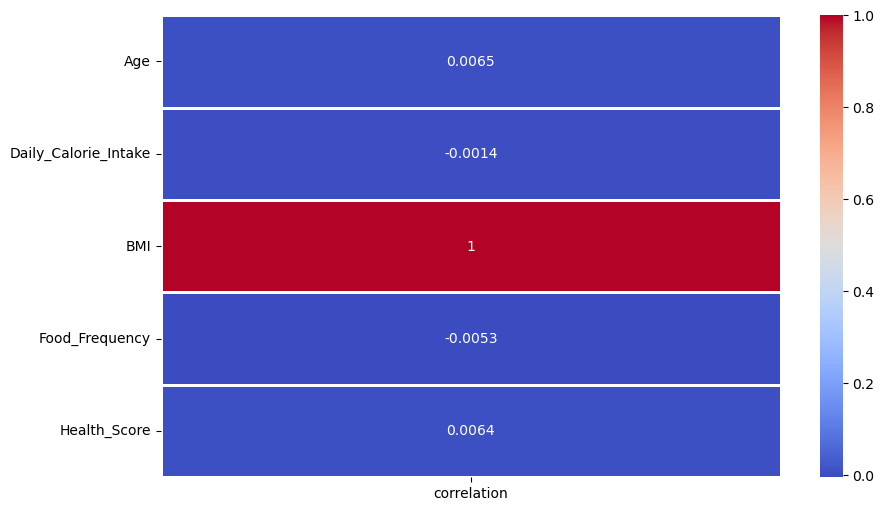

In [95]:
plt.figure(figsize=(10,6))
sb.heatmap(ffftoFrame, annot=True , cmap="coolwarm" , linecolor="white" , linewidths=2 )
plt.show()

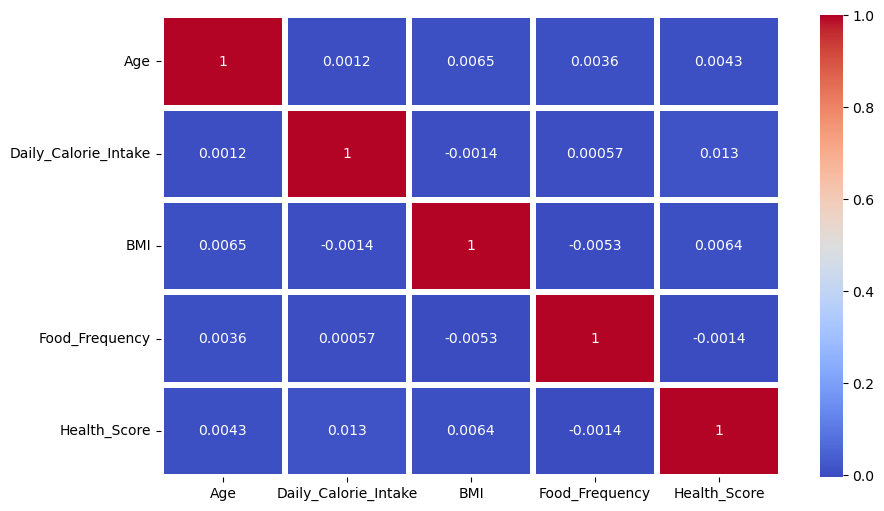

In [102]:
plt.figure(figsize=(10,6))
sb.heatmap(df_numeric.corr(), annot=True  , cmap="coolwarm",linecolor="white" , linewidths=3)
plt.show()

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17686 entries, 0 to 17685
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   17686 non-null  int64  
 1   Gender                17686 non-null  object 
 2   Region                17686 non-null  object 
 3   Diet_Type             17686 non-null  object 
 4   Primary_Cuisine       17686 non-null  object 
 5   Spice_Level           17686 non-null  object 
 6   Daily_Calorie_Intake  17686 non-null  int64  
 7   Health_Impact         17686 non-null  object 
 8   Common_Diseases       7037 non-null   object 
 9   Exercise_Level        17686 non-null  object 
 10  BMI                   17686 non-null  float64
 11  Food_Frequency        17686 non-null  int64  
 12  Sugar_Intake          17686 non-null  object 
 13  Salt_Intake           17686 non-null  object 
 14  Health_Score          17686 non-null  int64  
dtypes: float64(1), int6

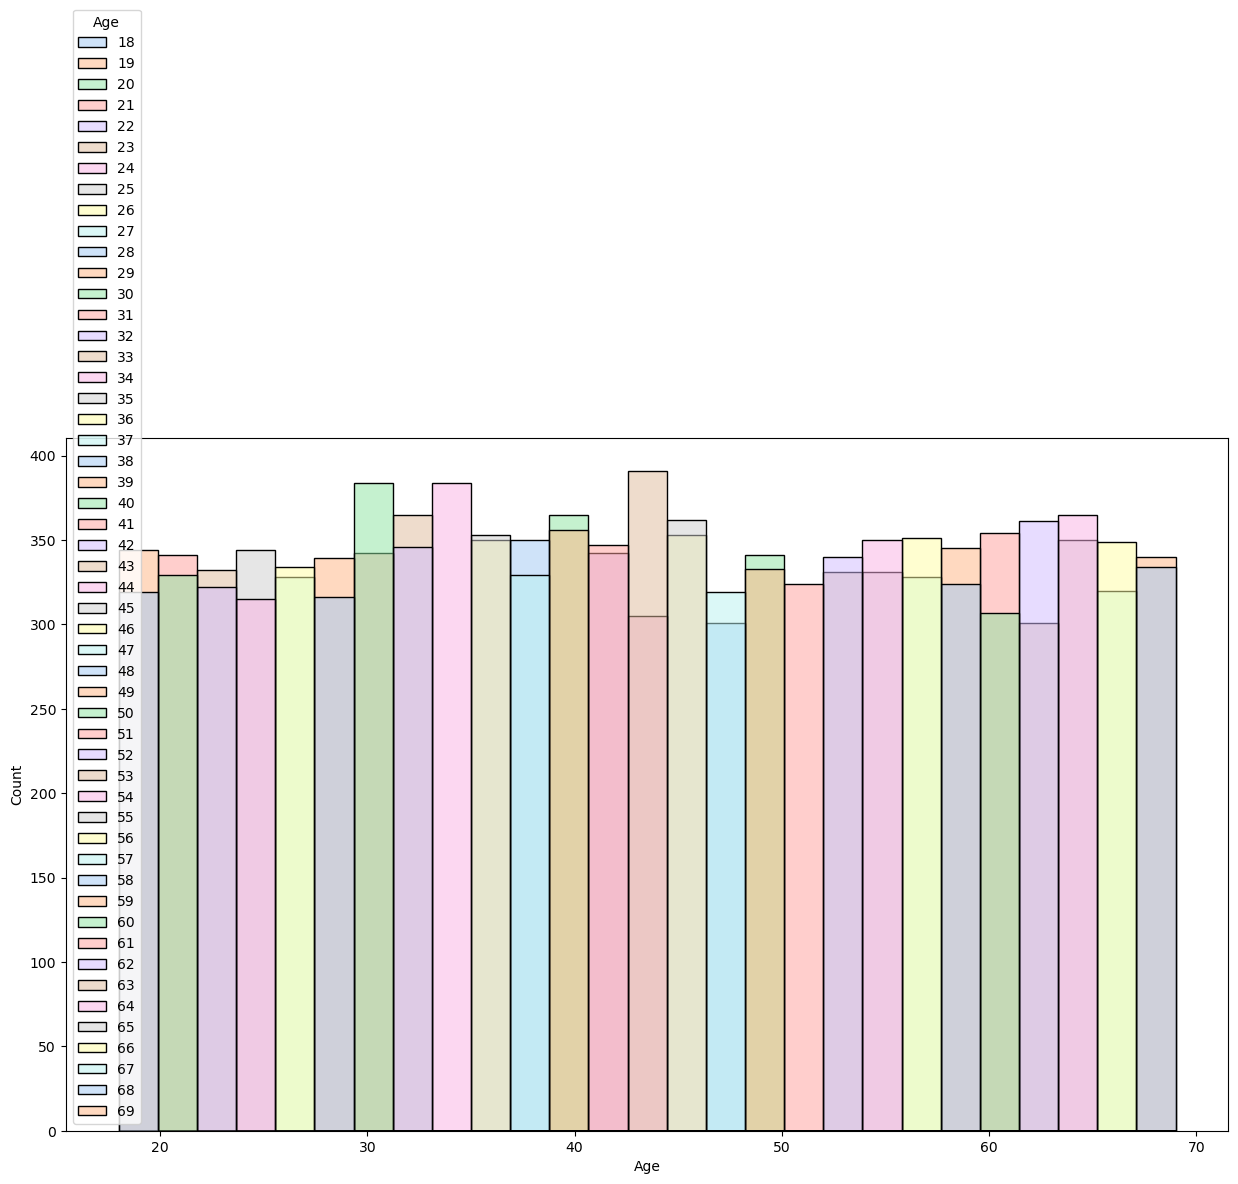

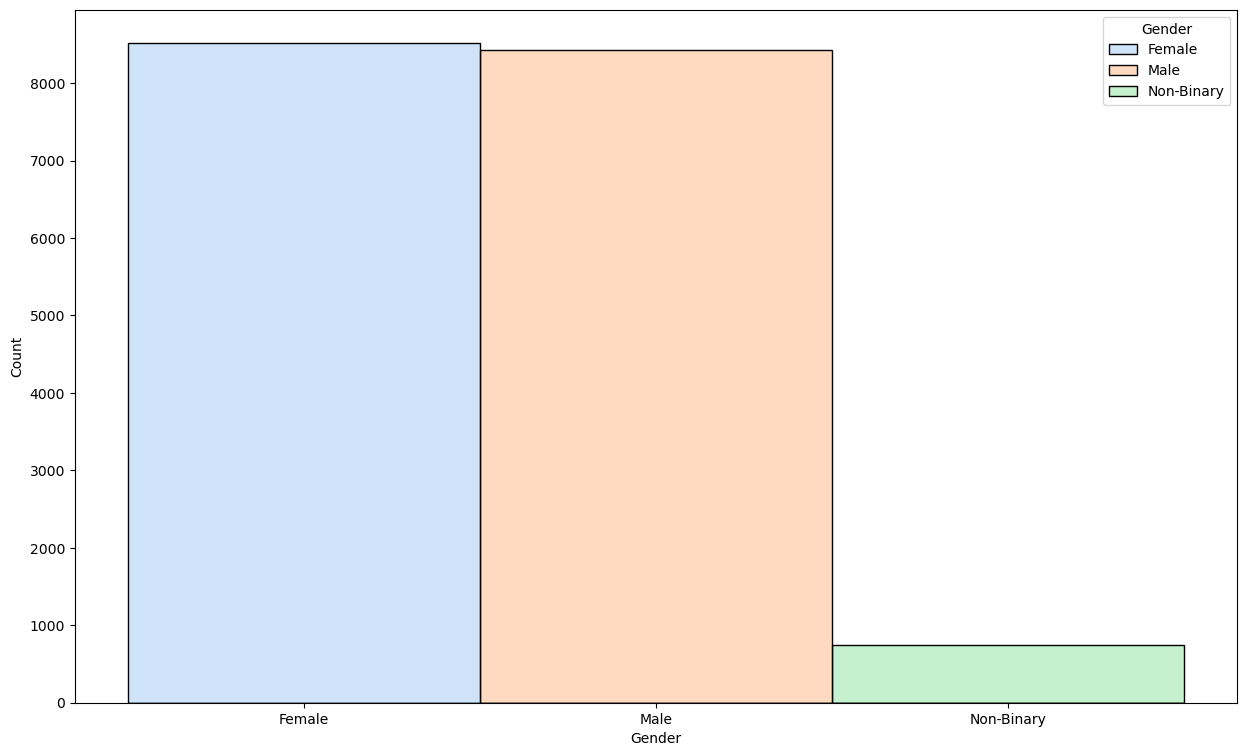

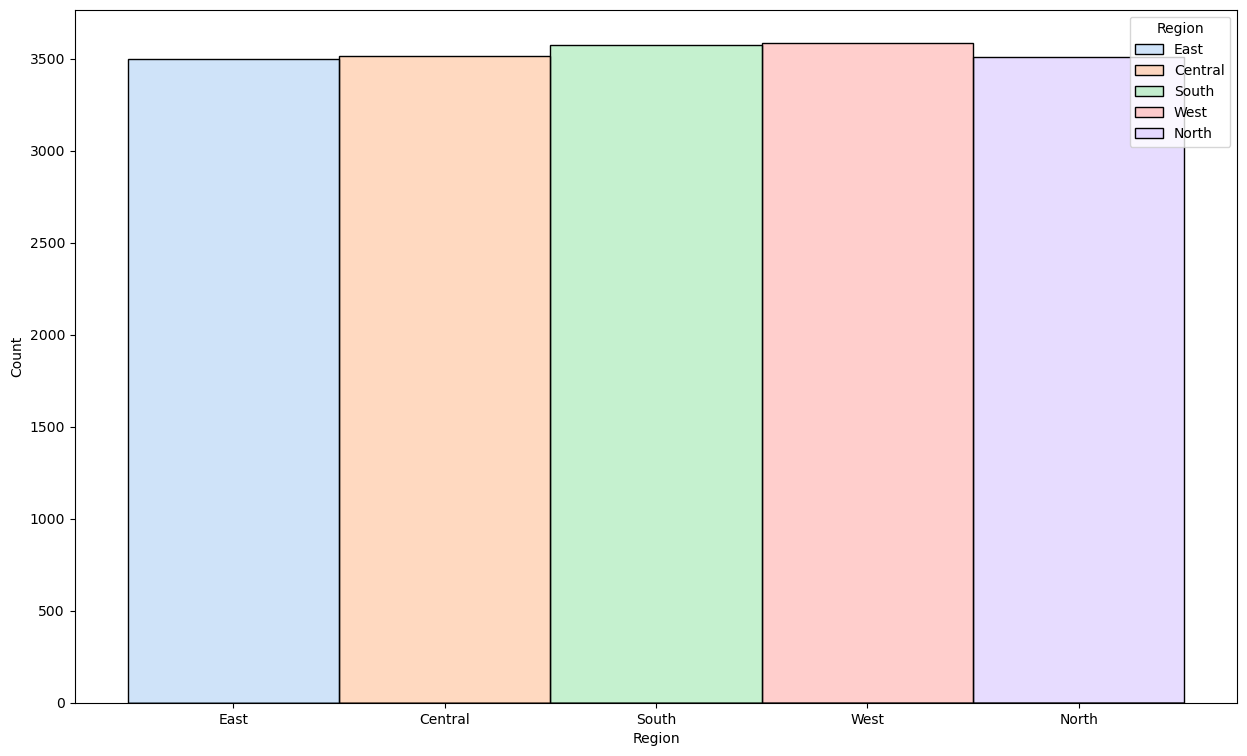

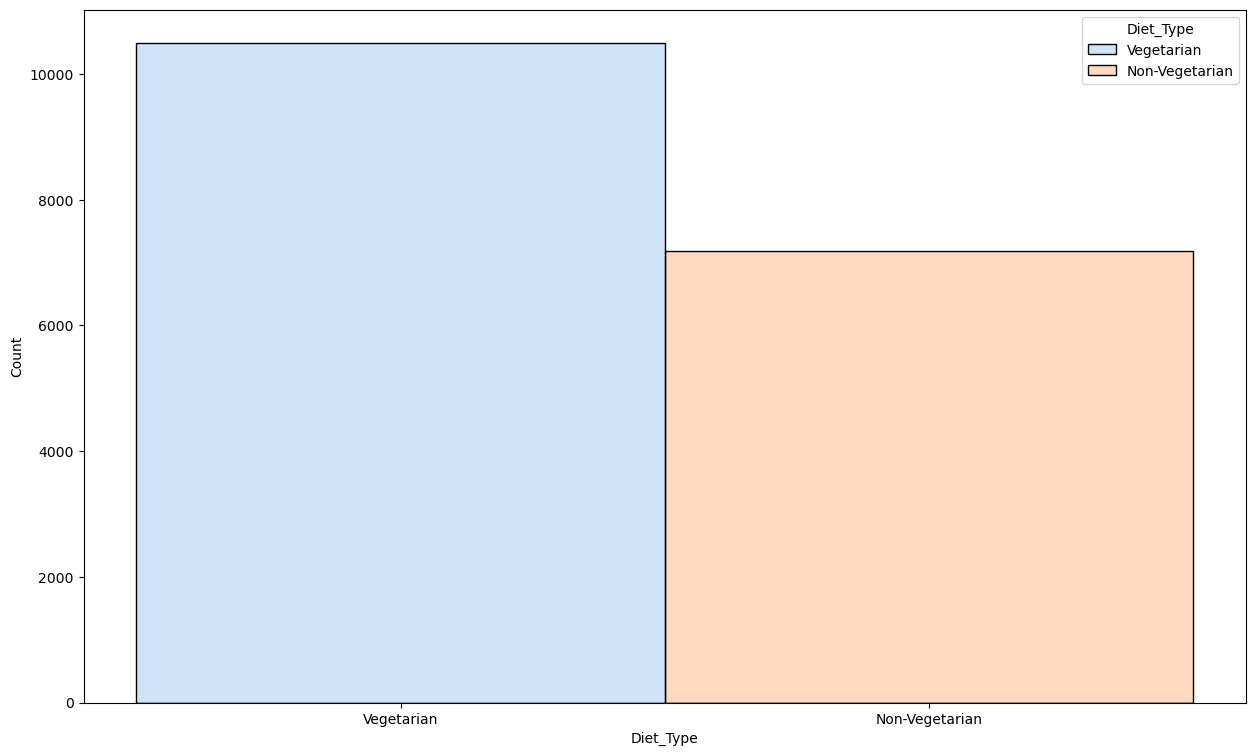

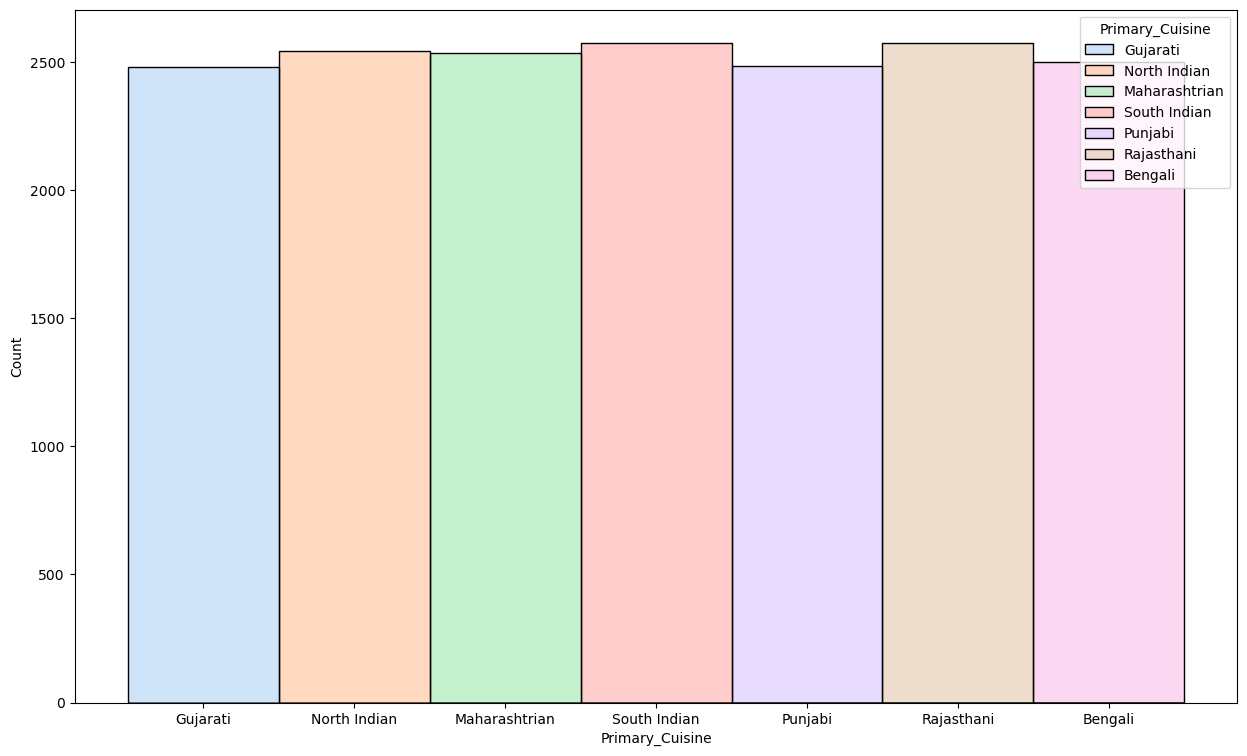

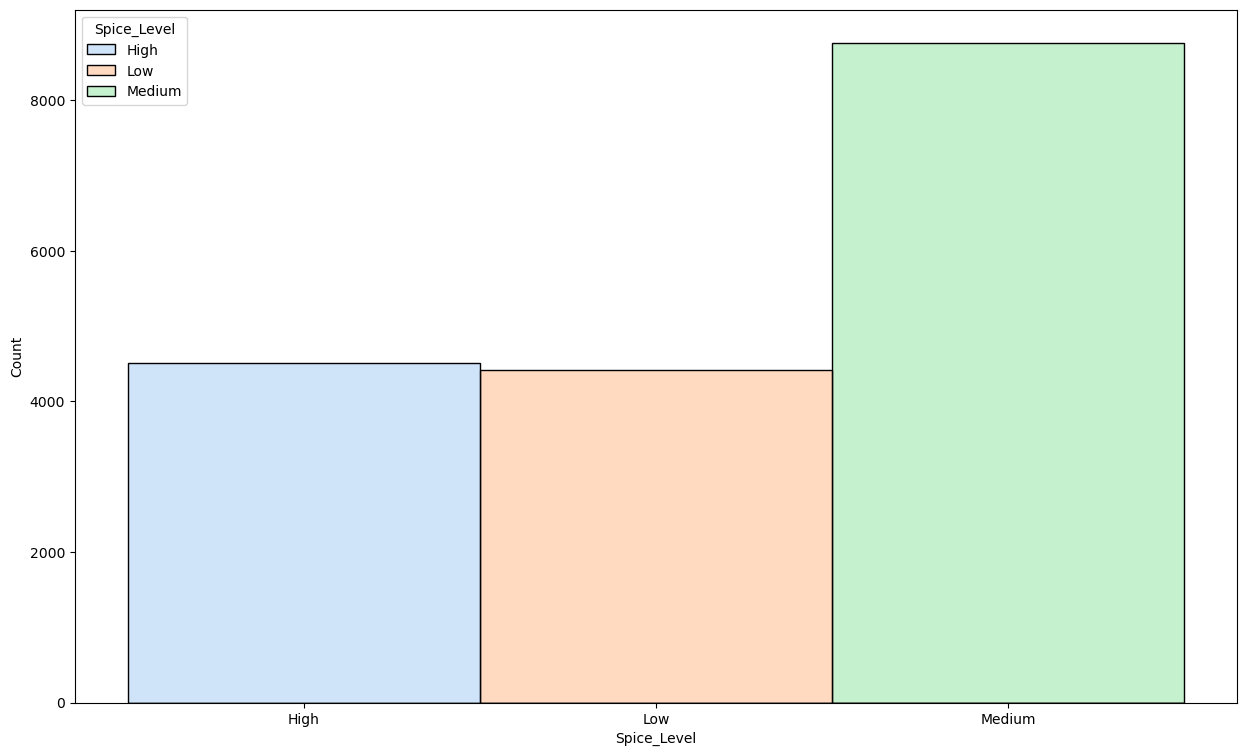

C:\Users\xxonu\anaconda_envs\test-env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


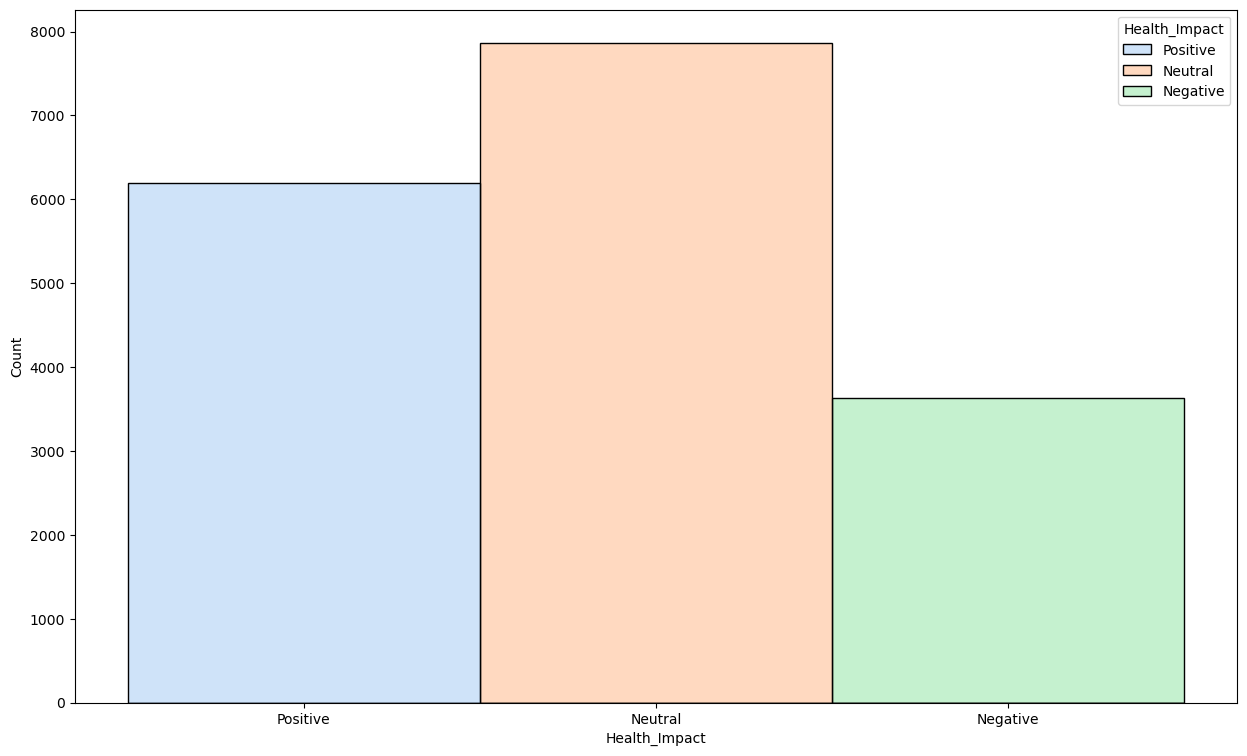

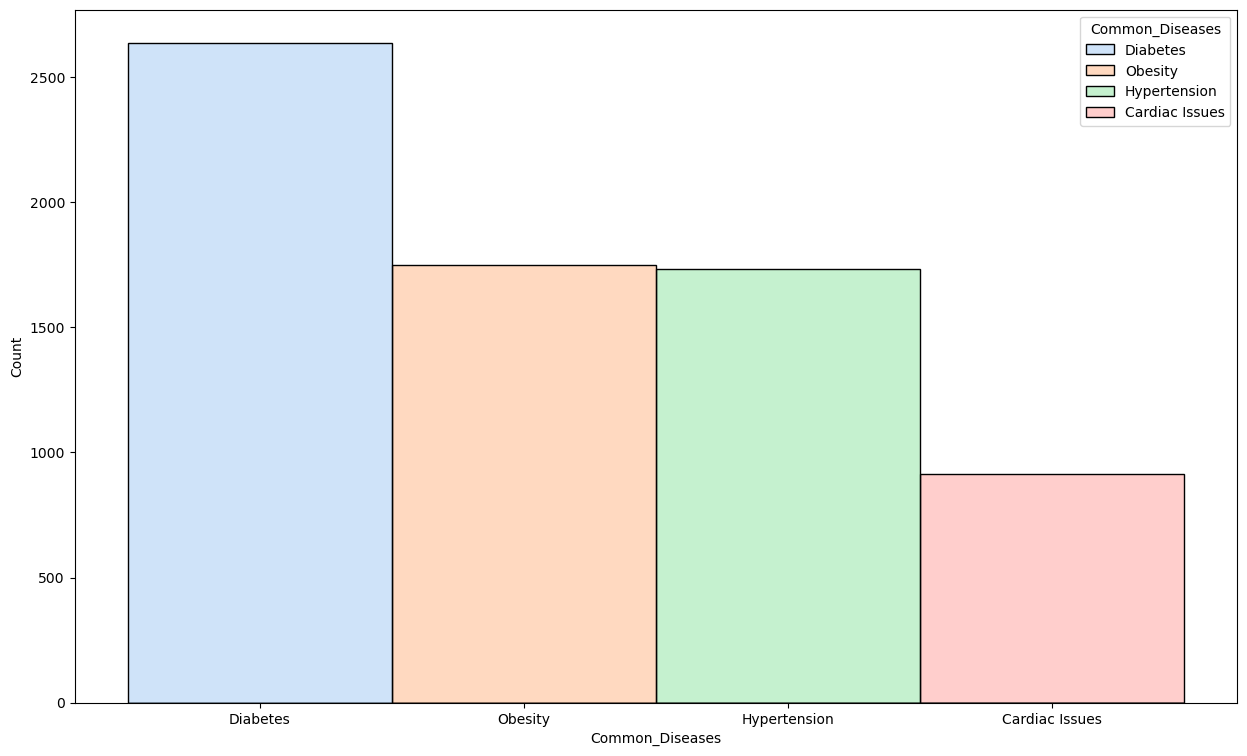

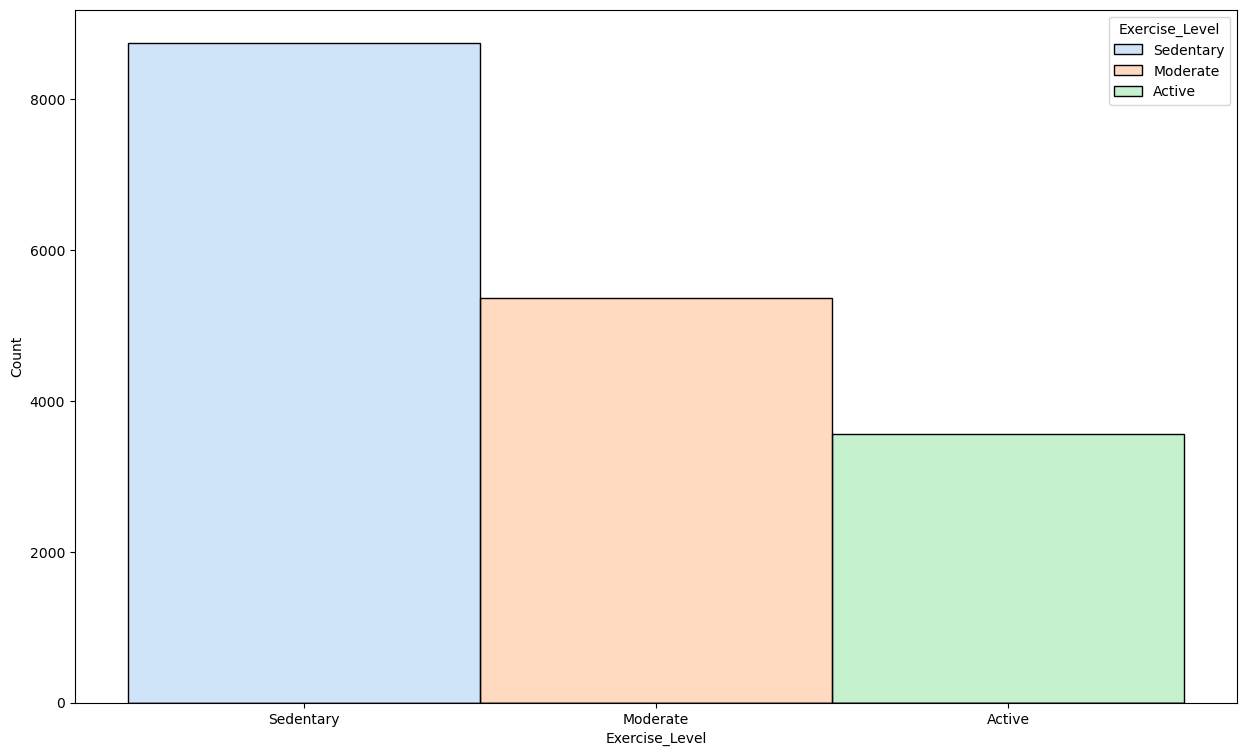

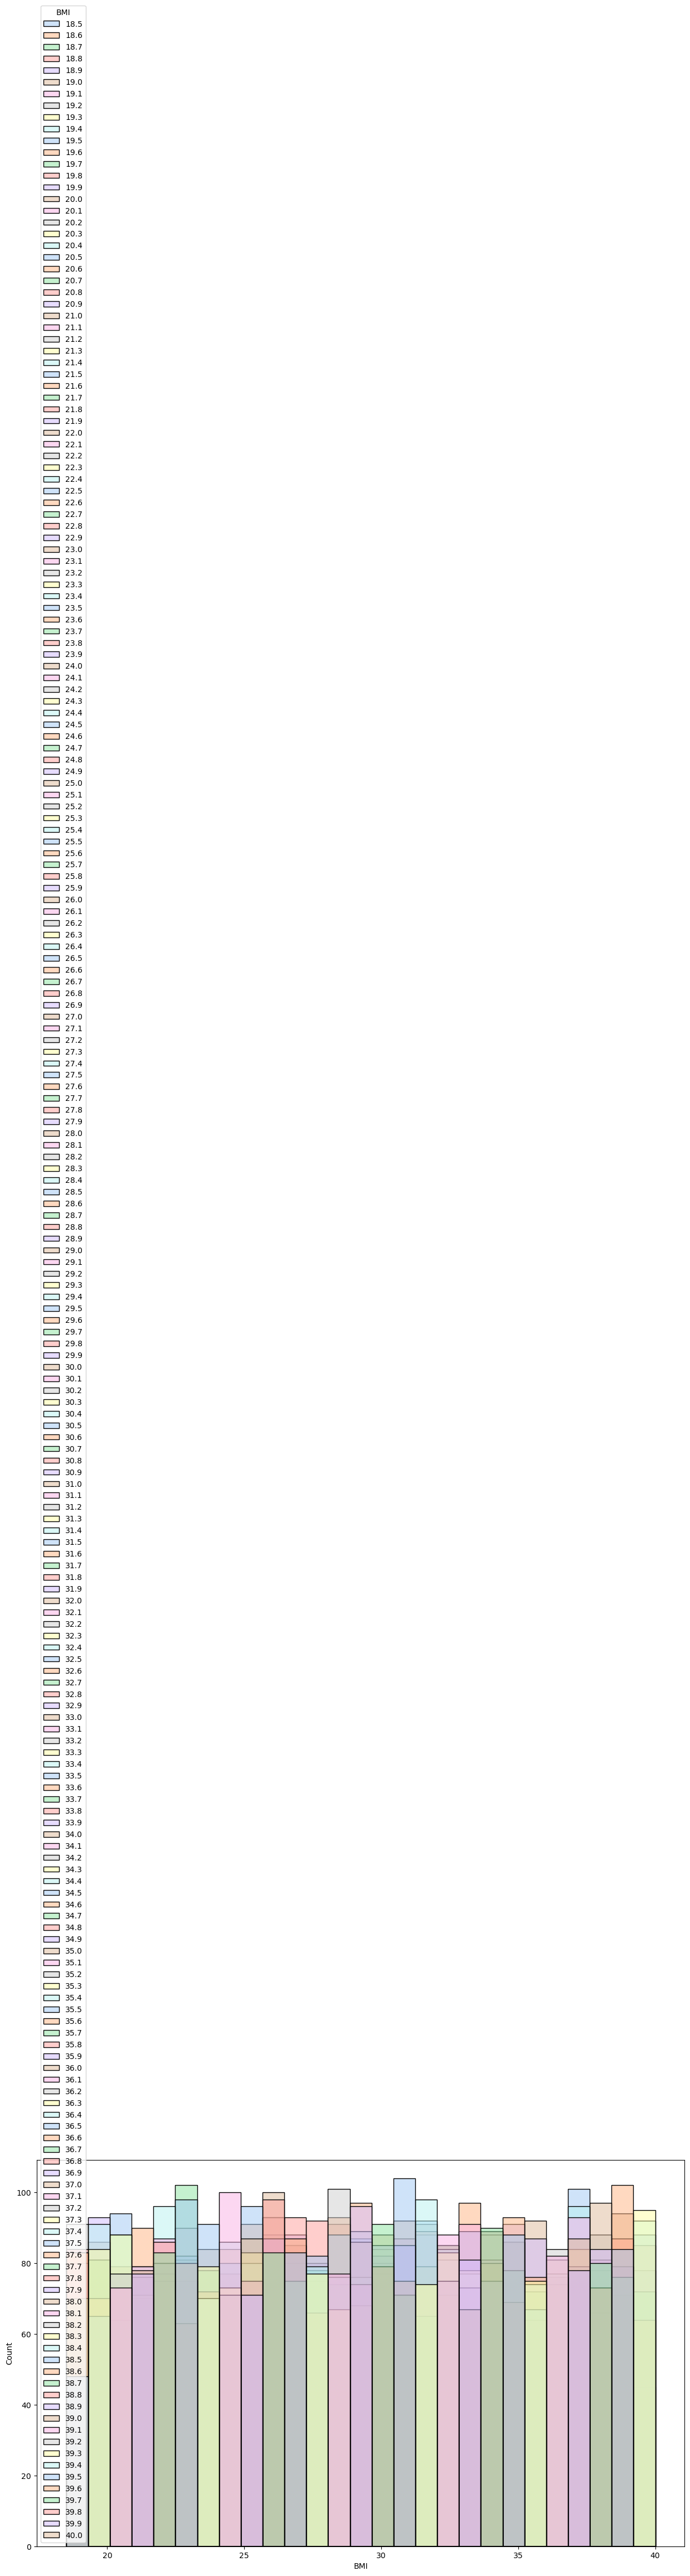

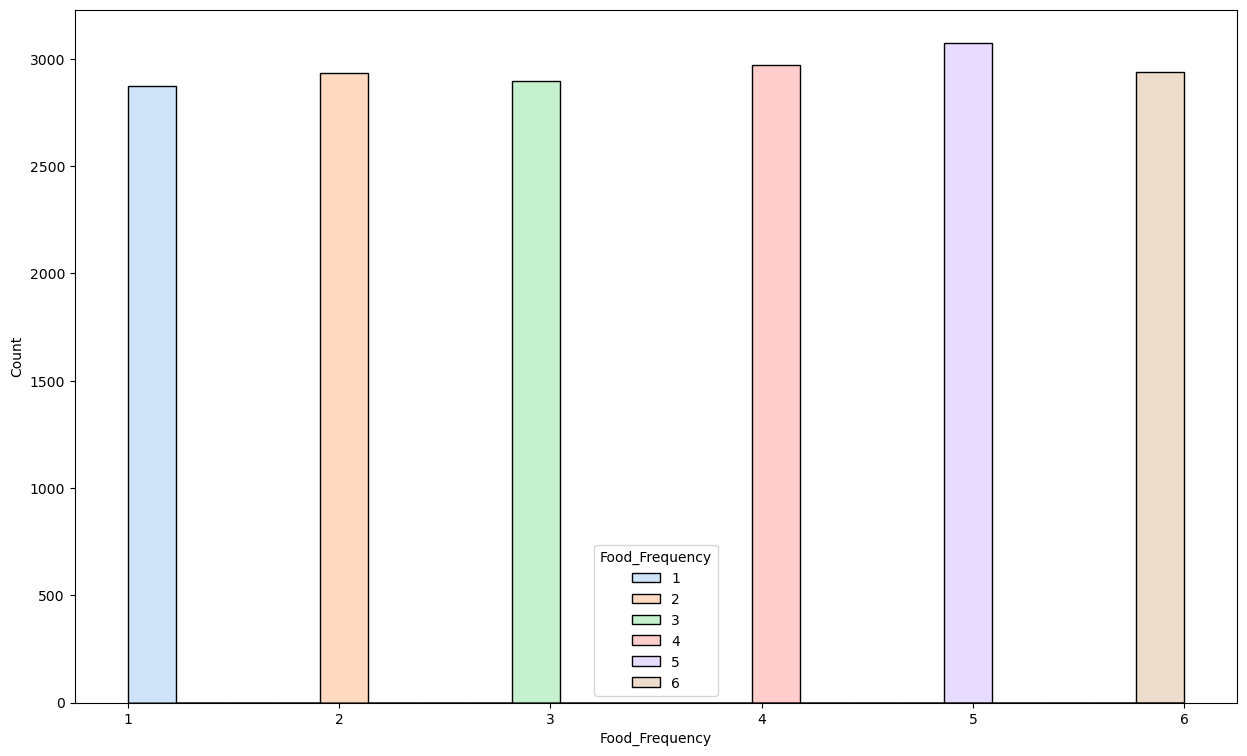

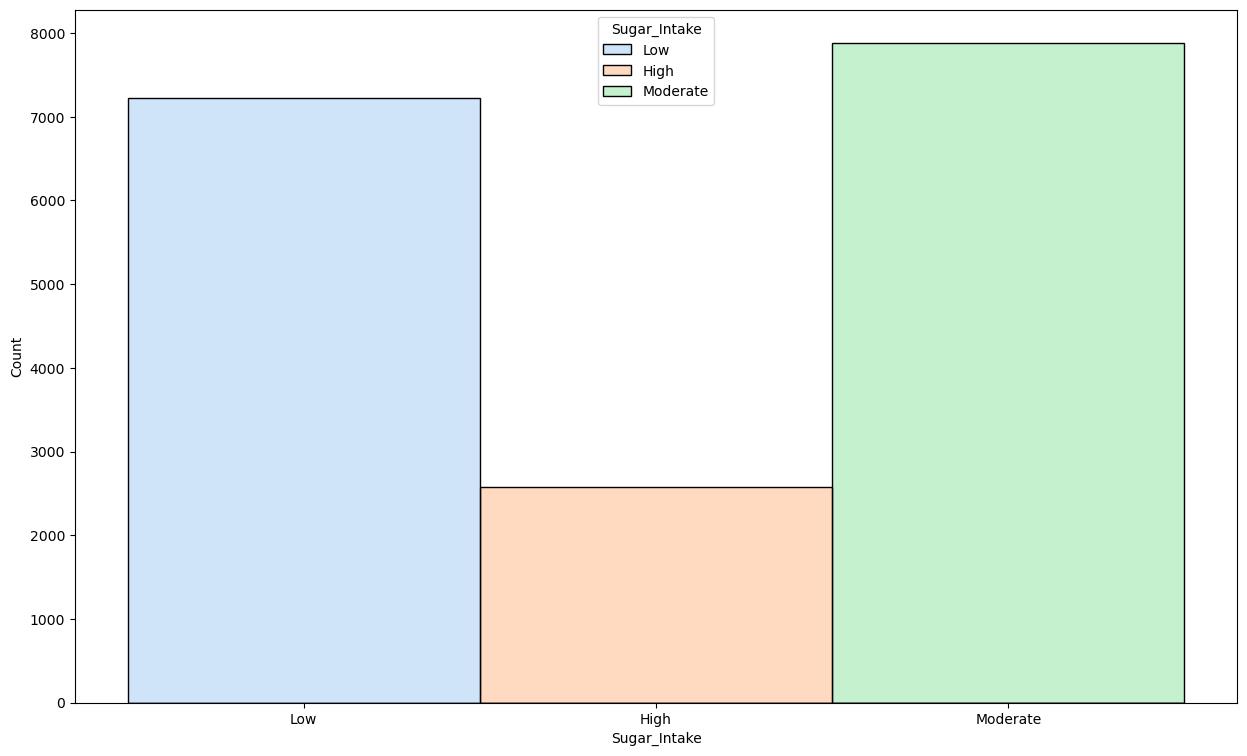

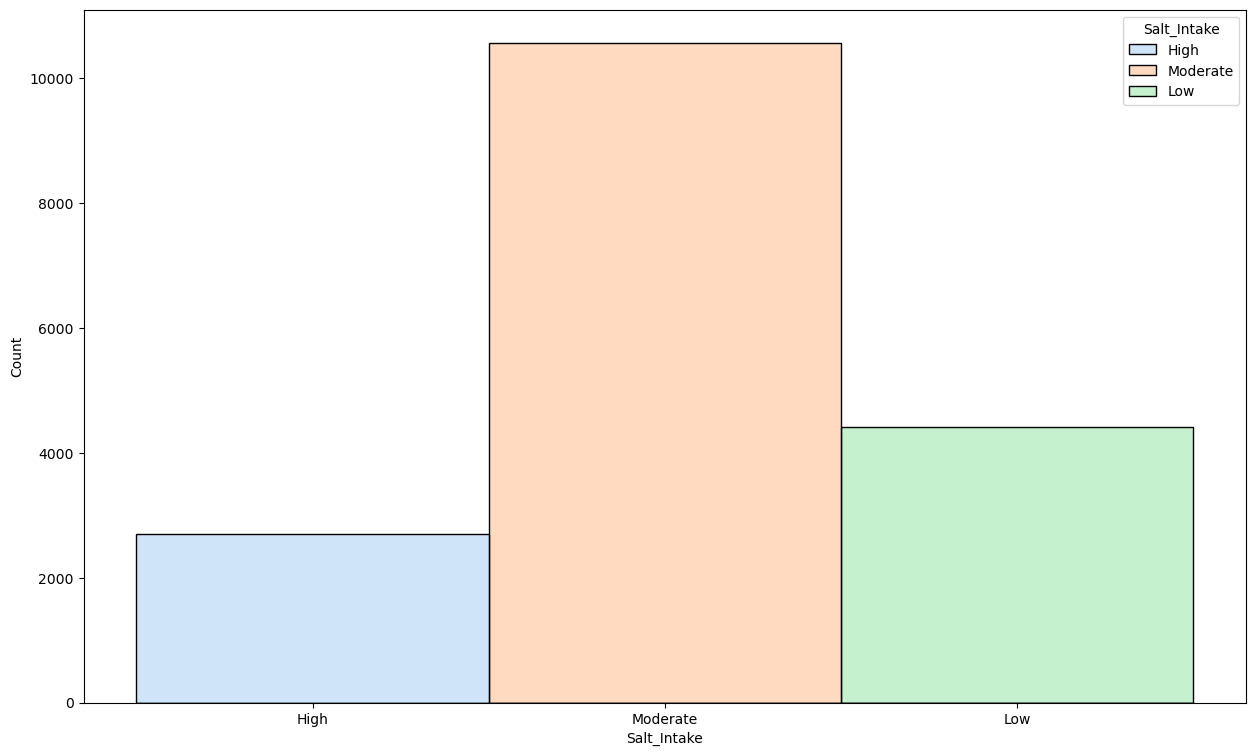

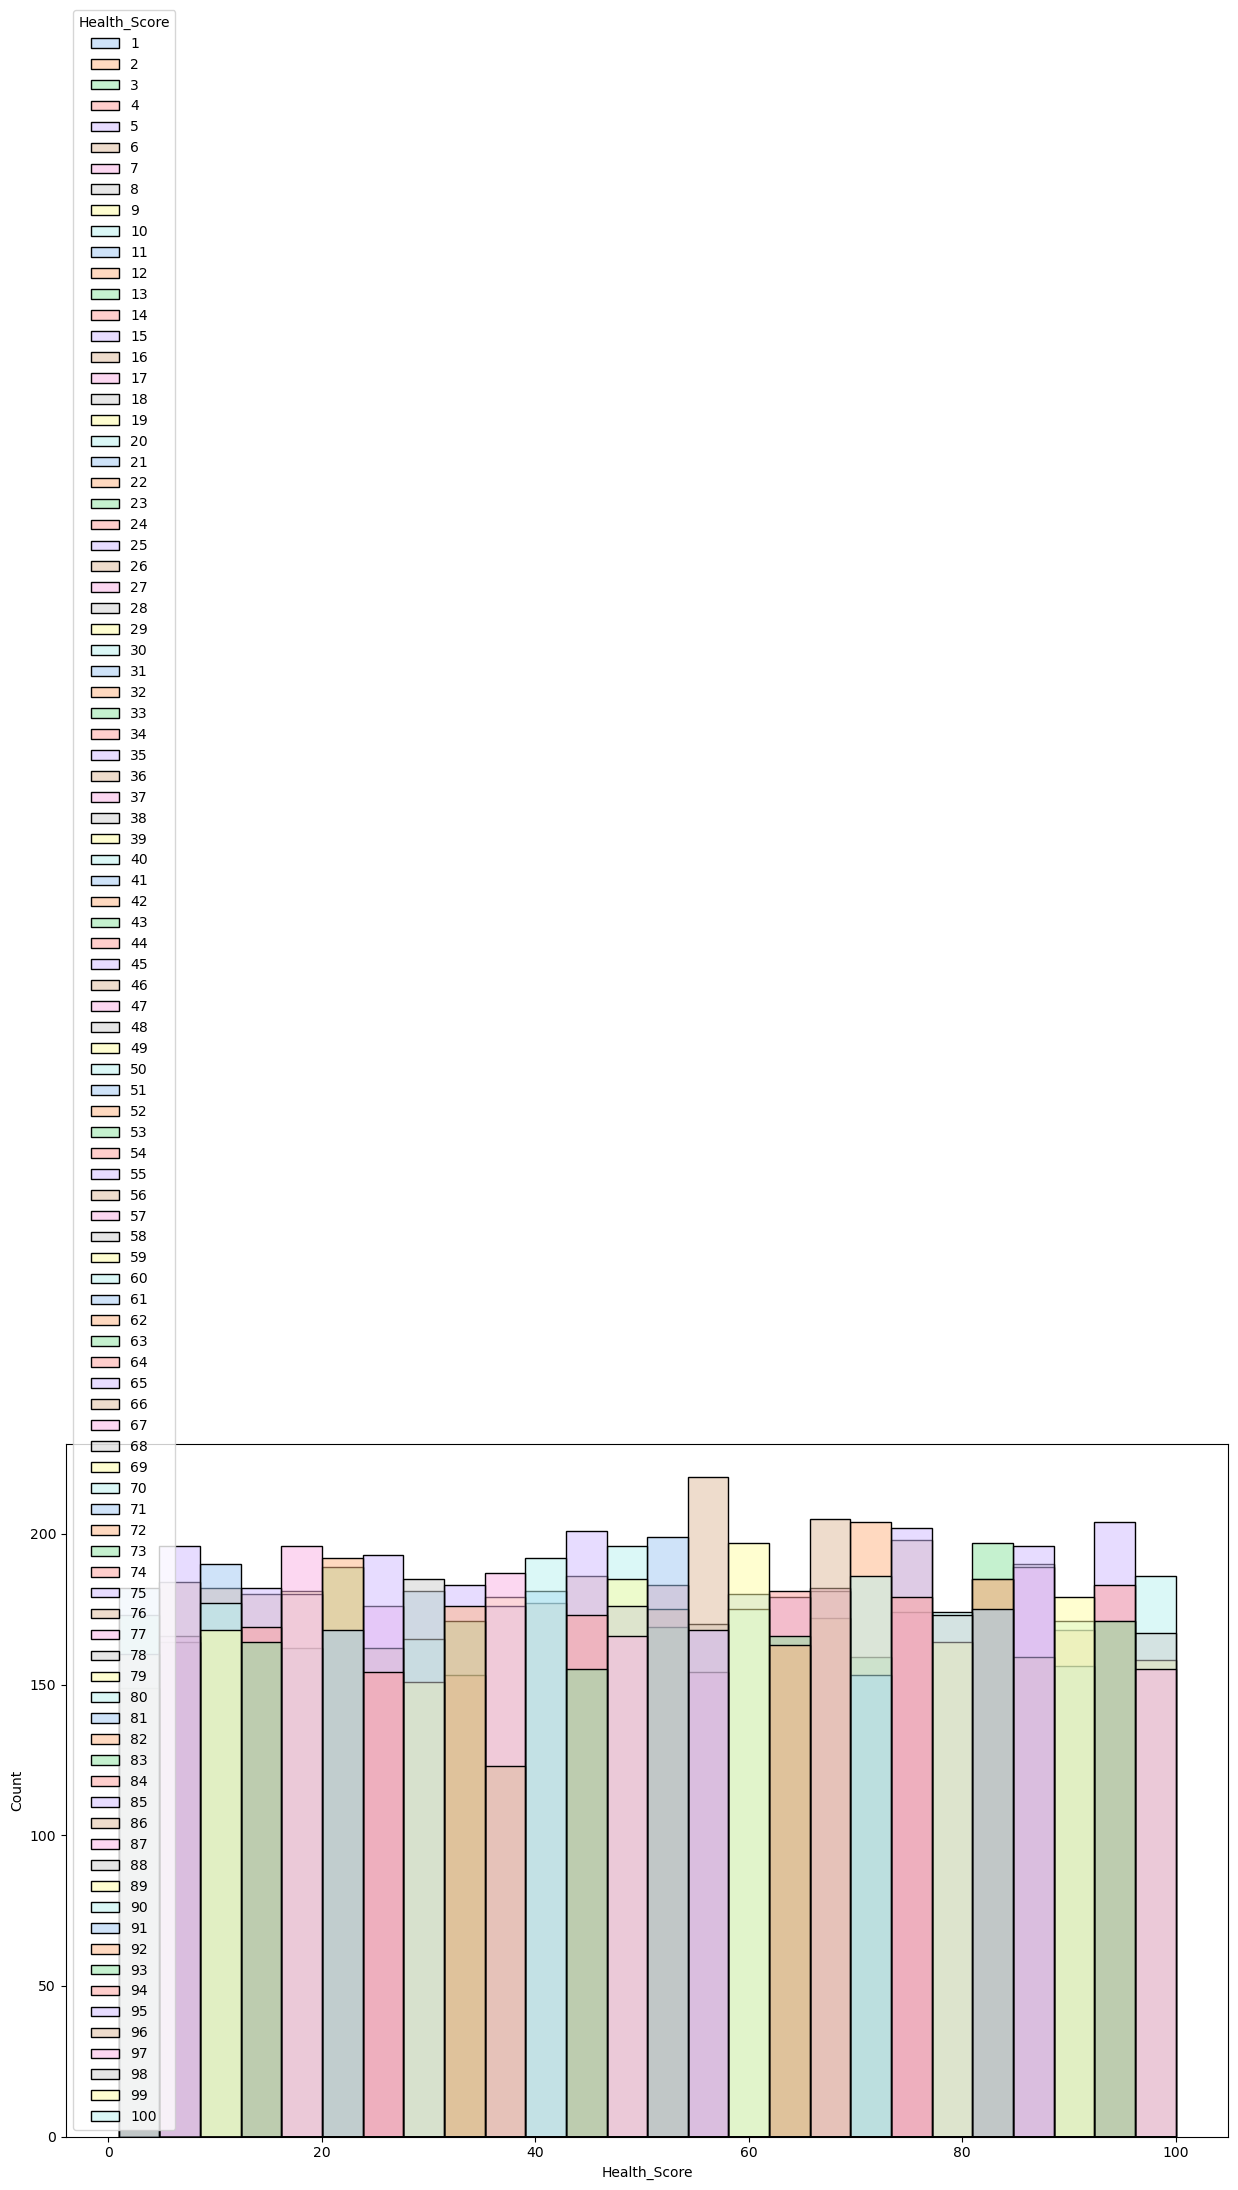

In [124]:
for col in df:
    plt.figure(figsize=(15,9))
    sb.histplot(x=col , data=df , palette="pastel" , hue=col )
    plt.show()

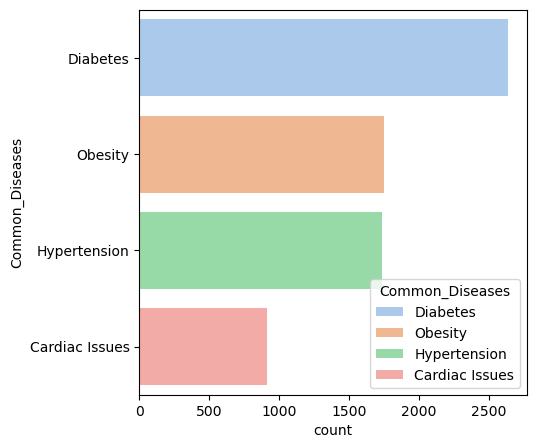

In [129]:
plt.figure(figsize=(5,5))
sb.countplot(data=df , y="Common_Diseases" , palette="pastel" , hue="Common_Diseases")
plt.show()

In [130]:
diabetData= df[df["Common_Diseases"] == "Diabetes" ]

In [147]:
diabetData.sort_values(by="Age" , ascending=True)

Age  Gender   Region       Diet_Type Primary_Cuisine Spice_Level  \
8662    18  Female     West      Vegetarian         Punjabi         Low   
4156    18    Male    North  Non-Vegetarian   Maharashtrian        High   
4974    18    Male     East  Non-Vegetarian         Bengali         Low   
8548    18    Male     West      Vegetarian         Punjabi      Medium   
2651    18  Female     East      Vegetarian    South Indian         Low   
...    ...     ...      ...             ...             ...         ...   
16489   69  Female  Central      Vegetarian   Maharashtrian      Medium   
16518   69  Female     East  Non-Vegetarian        Gujarati      Medium   
1307    69  Female     East  Non-Vegetarian         Bengali      Medium   
7338    69    Male     West  Non-Vegetarian         Punjabi        High   
16420   69    Male     East  Non-Vegetarian        Gujarati         Low   

       Daily_Calorie_Intake Health_Impact Common_Diseases Exercise_Level  \
8662                   2341      Positive        Diabetes       Moderate   
4156                   3384      Positive        Diabetes       Moderate   
4974                   1746      Positive        Diabetes      Sedentary   
8548                   1601       Neutral        Diabetes       Moderate   
2651                   2930      Positive        Diabetes       Moderate   
...                     ...           ...             ...            ...   
16489                  2548      Negative        Diabetes         Active   
16518                  1713      Positive        Diabetes      Sedentary   
1307                   2655      Positive        Diabetes      Sedentary   
7338                   3283       Neutral        Diabetes       Moderate   
16420                  2627      Positive        Diabetes      Sedentary   

        BMI  Food_Frequency Sugar_Intake Salt_Intake  Health_Score  
8662   38.5               6     Moderate    Moderate            21  
4156   32.2               3     Moderate    Moderate            27  
4974   20.0               1     Moderate    Moderate            73  
8548   20.6               2     Moderate    Moderate            48  
2651   30.5               3     Moderate         Low            32  
...     ...             ...          ...         ...           ...  
16489  18.7               5          Low    Moderate            54  
16518  27.4               3          Low    Moderate            69  
1307   19.1               4          Low    Moderate            74  
7338   39.7               4     Moderate    Moderate            82  
16420  36.8               2          Low        High            95  

[2639 rows x 15 columns]

<Axes: xlabel='Exercise_Level'>

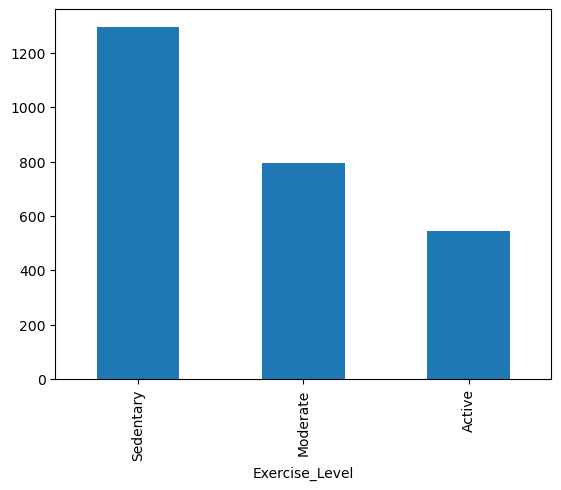

In [144]:
diabetData["Exercise_Level"].value_counts().plot(kind="bar")

<Axes: xlabel='Age'>

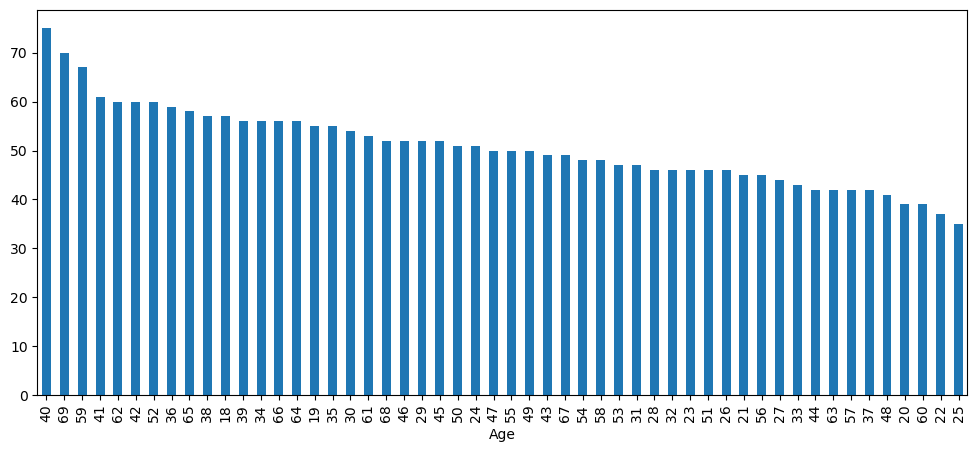

In [149]:
diabetData["Age"].value_counts().plot(kind="bar", figsize=(12,5))

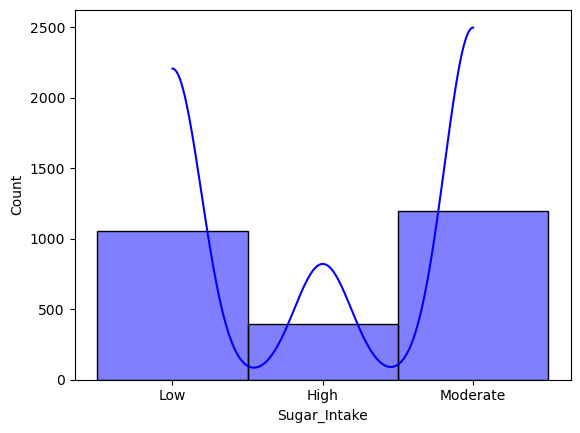

In [166]:
sb.histplot(diabetData["Sugar_Intake"]  ,kde=True , color="blue" )
plt.show()